# Problem Set III - 40313 Introduction to Probability

## Question 1

## Question 2

**a.** Generate in Matlab or in Python a sample $(x_{1,i},x_{2,i},x_{3,i})$ with ($i=1,\dots,1000$), of size 1000 from the distribution of three independent Gamma random variables with scale parameter $\lambda=2$ and shape parameter $k=1$.

In [1]:
import numpy as np

# Reproducibility
rng = np.random.default_rng(42)

# (a) Sample of size 1000: three independent Gamma(k=1, scale=2)
n = 1000
scale = 2.0
X = rng.gamma(shape=1.0, scale=scale, size=(n, 3))
x1, x2, x3 = X.T

**b.** Compute $y_i=x_{1,i}+x_{2,i}+x_{3,i}$.

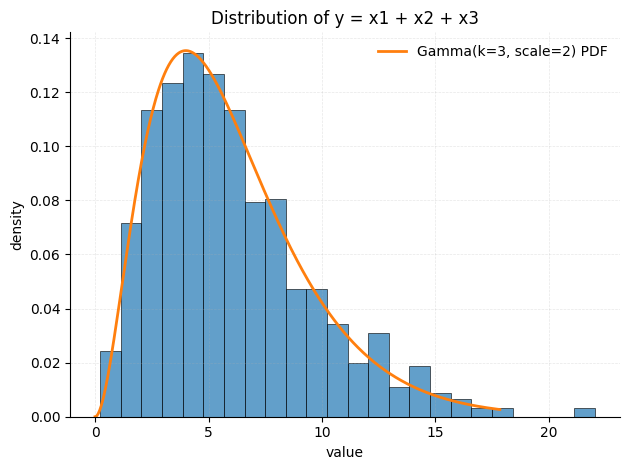

In [ ]:
import matplotlib.pyplot as plt
from math import gamma as gamma_fn

# (b) Sum each triple to form y
y = x1 + x2 + x3  # In theory: y ~ Gamma(k=3, scale=2)

def gamma_pdf(x, k, theta):
    x = np.asarray(x)
    return np.where(
        x >= 0,
        (x ** (k - 1)) * np.exp(-x / theta) / (gamma_fn(k) * (theta ** k)),
        0.0,
    )

# Publication-looking histogram for y with theoretical \Gamma(3,2) PDF
fig, ax = plt.subplots()
ax.hist(
    y,
    bins="fd",
    density=True,
    alpha=0.7,
    edgecolor="black",
    linewidth=0.6,
)

x_max = max(scale * 3 * 2.5, float(np.percentile(y, 99.5)))
grid = np.linspace(0.0, x_max, 600)
ax.plot(grid, gamma_pdf(grid, 3.0, scale), linewidth=2.0, label="Gamma(k=3, scale=2) PDF")

ax.set_title("Distribution of y = x1 + x2 + x3")
ax.set_xlabel("value")
ax.set_ylabel("density")
ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)
ax.legend(frameon=False)
fig.tight_layout()
plt.show()


**c.** Generate a random sample $z_i$ ($i=1,\dots,1000$) from a Gamma distribution with scale parameter $\lambda=2$ and shape parameter $k=3$.

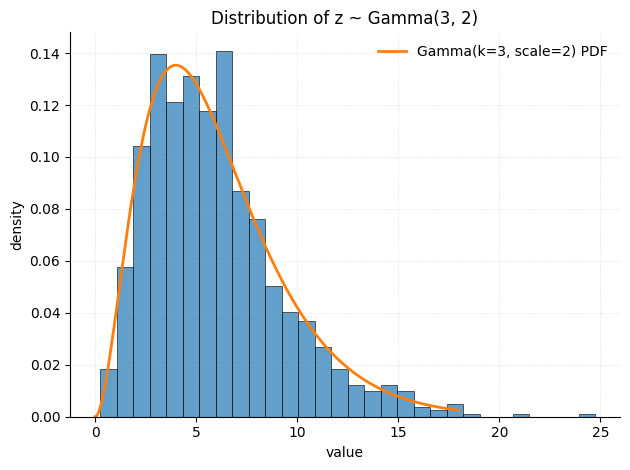

In [ ]:
import matplotlib.pyplot as plt
from math import gamma as gamma_fn

# (c) Independent comparison sample
z = rng.gamma(shape=3.0, scale=scale, size=n)

def gamma_pdf(x, k, theta):
    x = np.asarray(x)
    return np.where(
        x >= 0,
        (x ** (k - 1)) * np.exp(-x / theta) / (gamma_fn(k) * (theta ** k)),
        0.0,
    )

# Publication-looking histogram for z with theoretical \Gamma(3,2) PDF
fig, ax = plt.subplots()
ax.hist(
    z,
    bins="fd",
    density=True,
    alpha=0.7,
    edgecolor="black",
    linewidth=0.6,
)

x_max = max(scale * 3 * 2.5, float(np.percentile(z, 99.5)))
grid = np.linspace(0.0, x_max, 600)
ax.plot(grid, gamma_pdf(grid, 3.0, scale), linewidth=2.0, label="Gamma(k=3, scale=2) PDF")

ax.set_title("Distribution of z ~ Gamma(3, 2)")
ax.set_xlabel("value")
ax.set_ylabel("density")
ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)
ax.legend(frameon=False)
fig.tight_layout()
plt.show()


**d.** Compare the histogram of $y_1,\dots,y_{1000}$ with the histogram of $z_1,\dots,z_{1000}$.

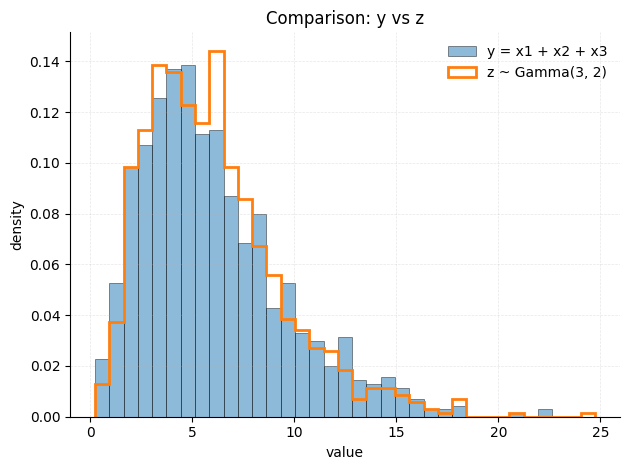

In [4]:
import matplotlib.pyplot as plt

# (d) Overlaid, normalized histograms of y and z using identical bins
combined = np.concatenate([y, z])
bins = np.histogram_bin_edges(combined, bins="fd")  # common bins for fair comparison

fig, ax = plt.subplots()
ax.hist(y, bins=bins, density=True, alpha=0.5, edgecolor="black", linewidth=0.6, label="y = x1 + x2 + x3")
ax.hist(z, bins=bins, density=True, histtype="step", linewidth=2.0, label="z ~ Gamma(3, 2)")

ax.set_title("Comparison: y vs z")
ax.set_xlabel("value")
ax.set_ylabel("density")
ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)
ax.legend(frameon=False)
fig.tight_layout()
plt.show()